[data scienc salary](https://www.kaggle.com/datasets/willianoliveiragibin/salary-data-analist/code)

# Exploratory Data Analysis of the Data Science Dataset

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('C:/Users/DAVID/Desktop/USE THIS DATASET/ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [5]:
df.shape

(3755, 11)

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [44]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [7]:
# check for null values
df[df.isnull()].sum()

work_year             0.0
experience_level        0
employment_type         0
job_title               0
salary                0.0
salary_currency         0
salary_in_usd         0.0
employee_residence      0
remote_ratio          0.0
company_location        0
company_size            0
dtype: object

In [8]:
# the number of job available in data science field.
unique = df['job_title'].unique()
unique

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [9]:
# give the result of how  many interviewees in each job titles is in the data
unique_job_titles = df['job_title'].unique()
unique_job_titles = len(unique_job_titles)
print(f'There are {unique_job_titles} different jobs in data science')

There are 93 different jobs in data science


In [10]:
# average salary earned by different field 
mean_salary_by_job_tile = df.groupby('job_title')['salary_in_usd'].mean()
mean_salary_by_job_tile

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64

In [11]:
# this piece of can be used to the check the average salary in each job tialary_in_usd'].agg('mean')tle in usd
jobs = df.groupby('job_title')['salary_in_usd'].agg('mean')

# for example to check the mean salary of an ML Engineer
ml_engineer = np.round(jobs['ML Engineer'], decimals=2)
print(f'The average  salary of ML Engineer in usd is ${ml_engineer}')

The average  salary of ML Engineer in usd is $158352.44


In [12]:
# average salary per company size
mean_salry_by_company_size = df.groupby('company_size')['salary_in_usd'].agg(['mean', 'count'])
print(mean_salry_by_company_size)

                       mean  count
company_size                      
L             118300.982379    454
M             143130.548367   3153
S              78226.682432    148


In [26]:
# average salary by country
mean_salary_by_company_location = df.groupby('company_location')['salary_in_usd'].agg(['mean', 'count'])
mean_salary_by_company_location.sort_values(by='mean', ascending=False)

,mean,count
company_location,,
IL,271446.500000,2
PR,167500.000000,4
US,151822.009539,3040
RU,140333.333333,3
CA,131917.689655,87
...,...,...
VN,12000.000000,1
AL,10000.000000,1
MA,10000.000000,1


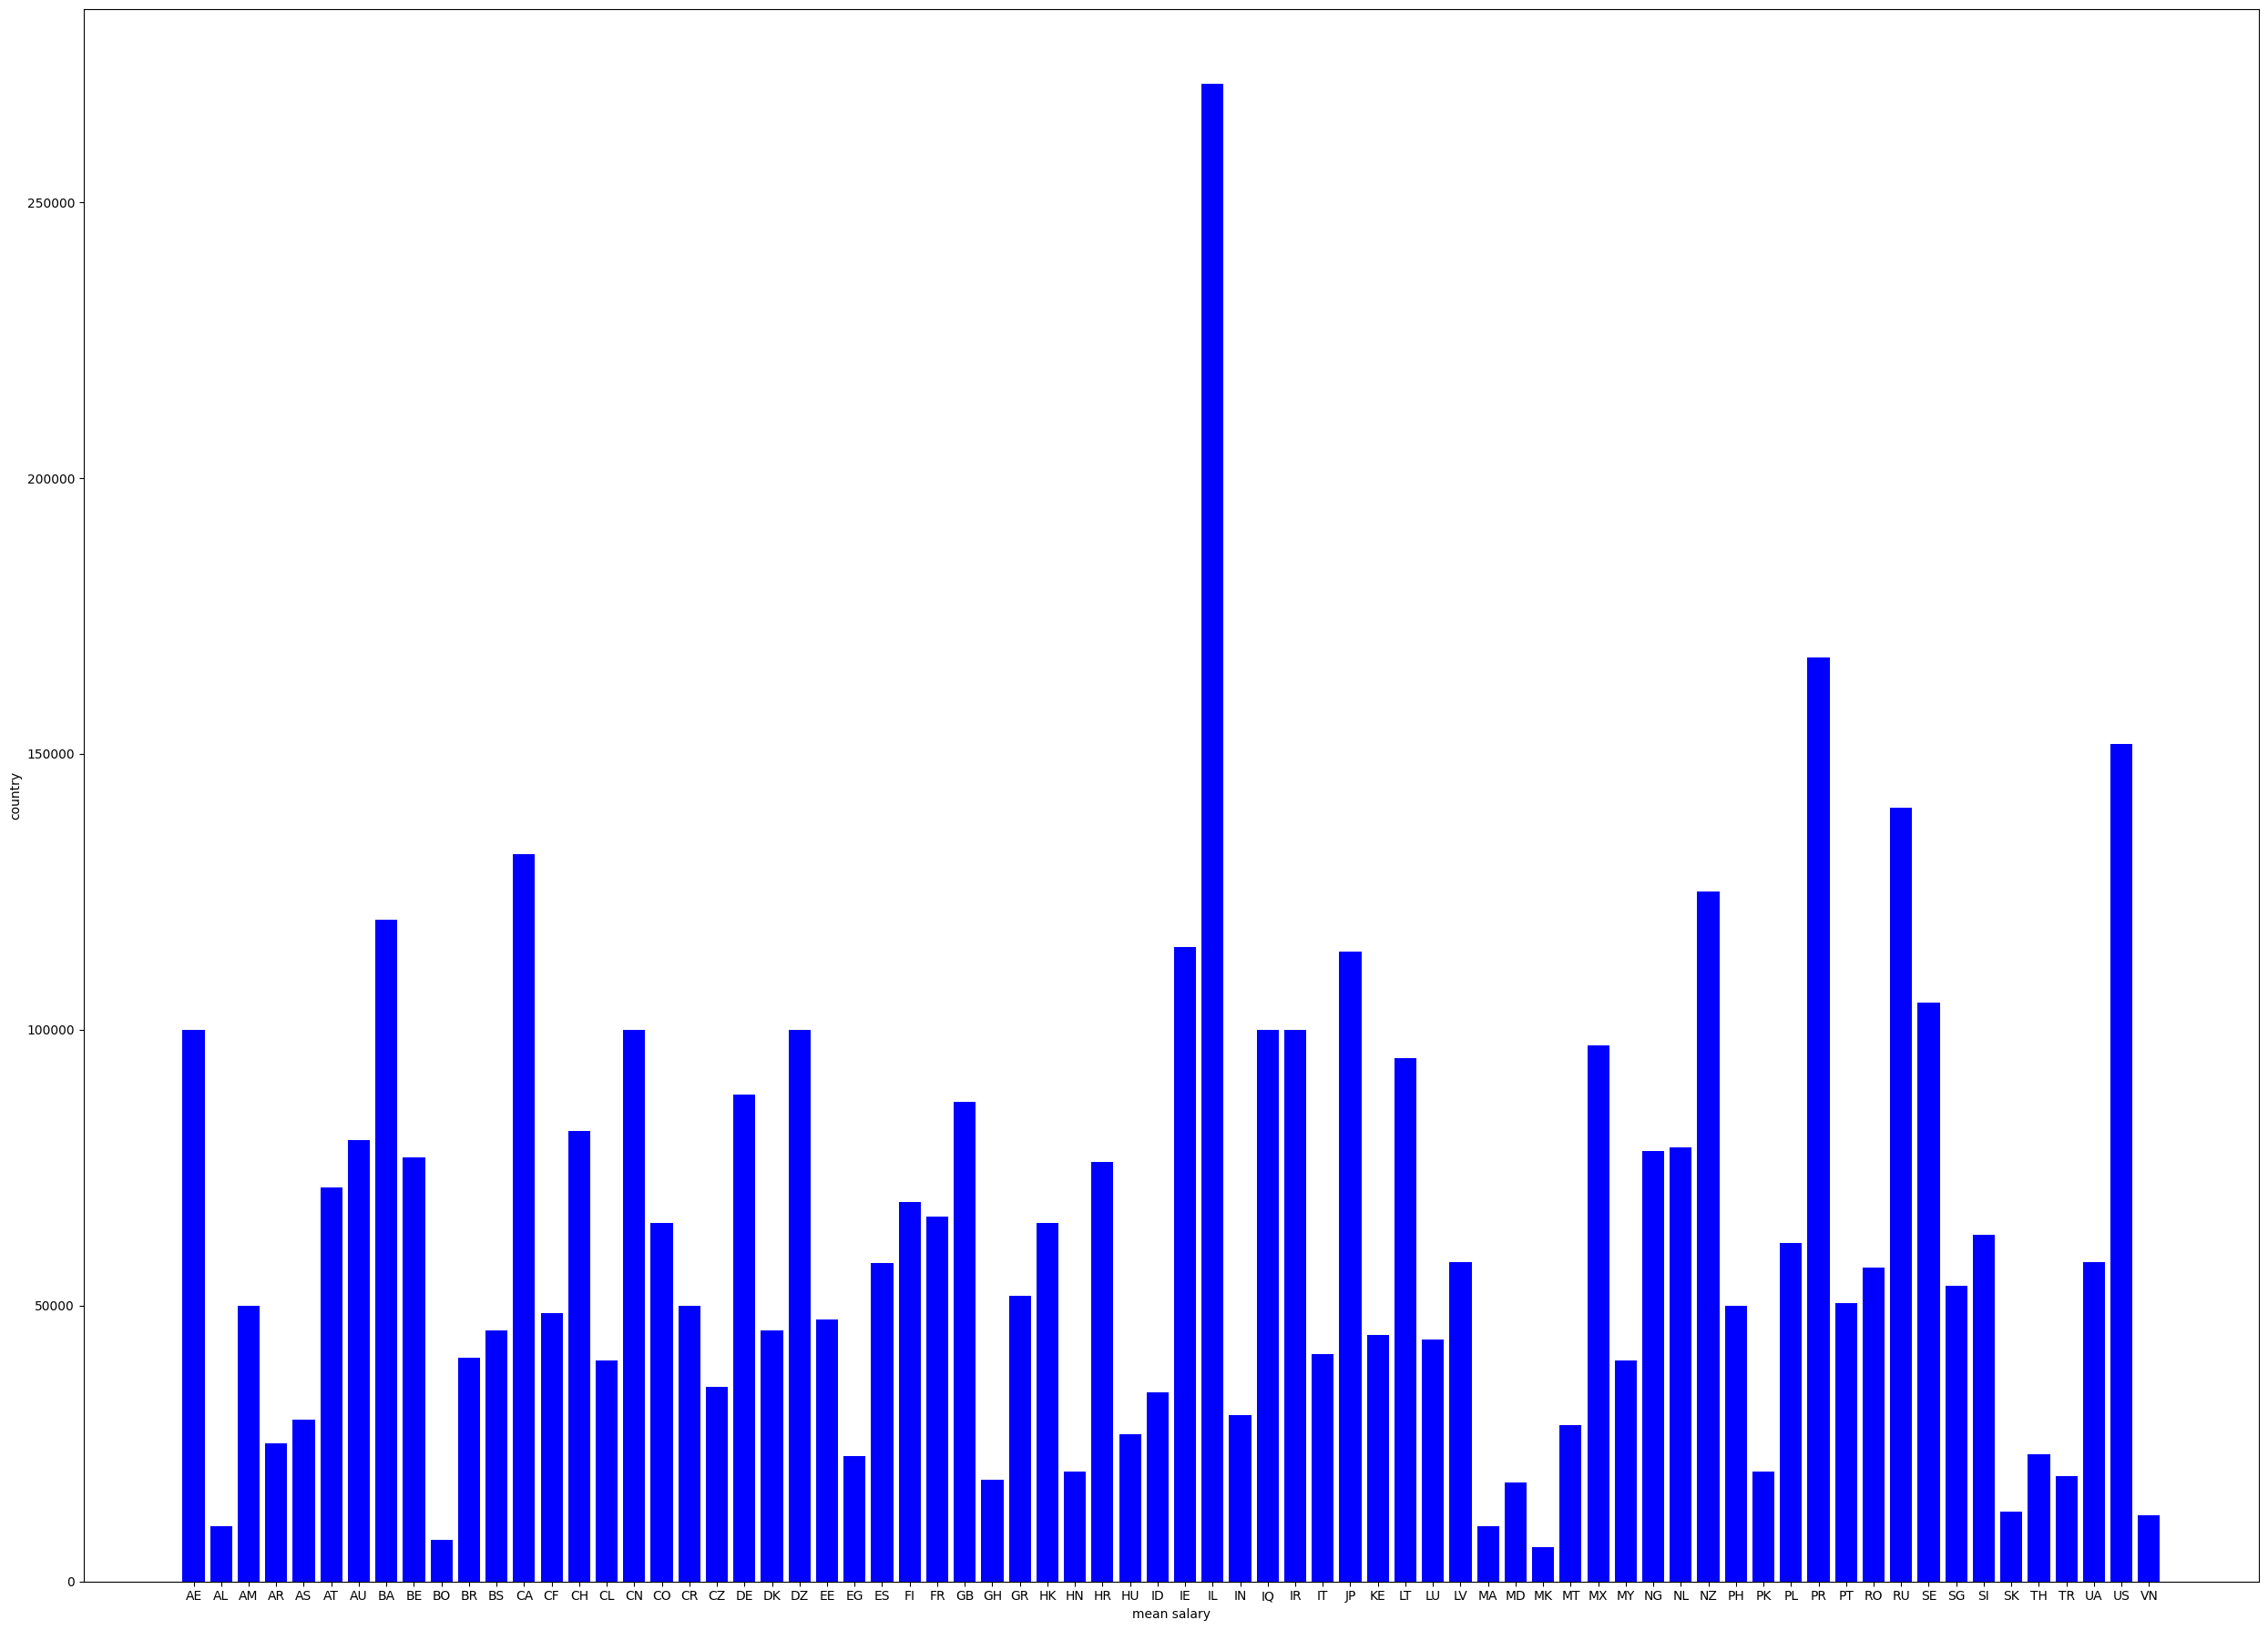

In [14]:
#graph between company location versus mean salary
plt.figure(figsize = (25,18))
plt.bar(mean_salary_by_country.index, mean_salary_by_country['mean'], color = 'blue')
plt.xlabel('mean salary')
plt.ylabel('country')
plt.tight_layout()

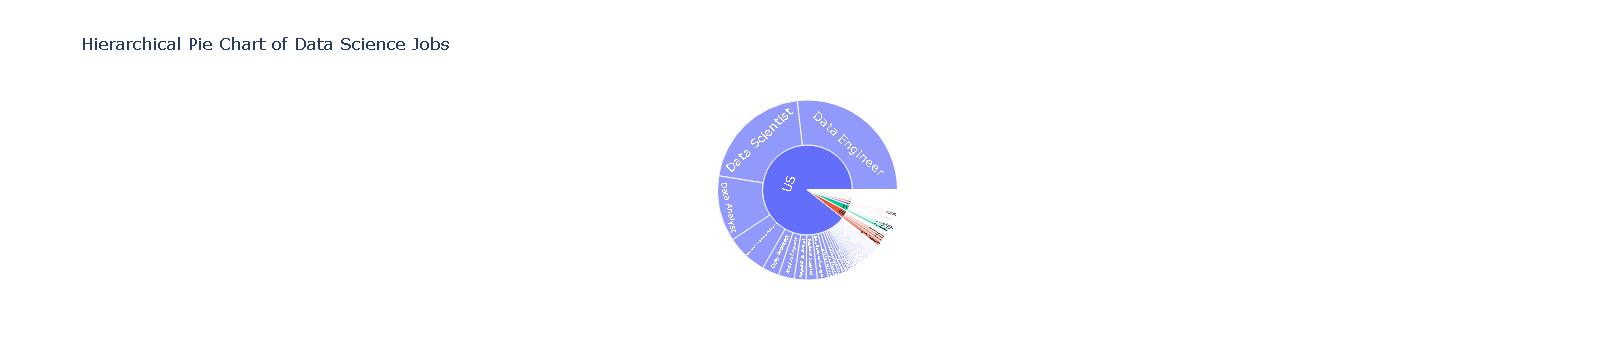

In [60]:
import plotly.express as px

fig = px.sunburst(df, path=['company_location', 'job_title'], values='salary_in_usd', title='Hierarchical Pie Chart of Data Science Jobs')
fig.show()

In [53]:
# Let's look at the top 10 data science jobs
jobs = df.groupby('job_title')['salary_in_usd'].agg(['mean', 'count'])
trend = jobs.sort_values(by='count', ascending=False)
trend[:10]

,mean,count
job_title,,
Data Engineer,142785.734615,1040
Data Scientist,140869.765476,840
Data Analyst,108716.227124,612
Machine Learning Engineer,154690.726644,289
Analytics Engineer,152368.631068,103
Data Architect,161713.772277,101
Research Scientist,161214.195122,82
Data Science Manager,191278.775862,58
Applied Scientist,190264.482759,58


In [91]:
top_ten = pd.DataFrame({ 'jobs': trend.index, 'values': trend['count']})[:10]
top_ten.reset_index(drop=True)

,jobs,values
0,Data Engineer,1040
1,Data Scientist,840
2,Data Analyst,612
3,Machine Learning Engineer,289
4,Analytics Engineer,103
5,Data Architect,101
6,Research Scientist,82
7,Data Science Manager,58
8,Applied Scientist,58
9,Research Engineer,37


Text(0, 0.5, 'Job Titles')

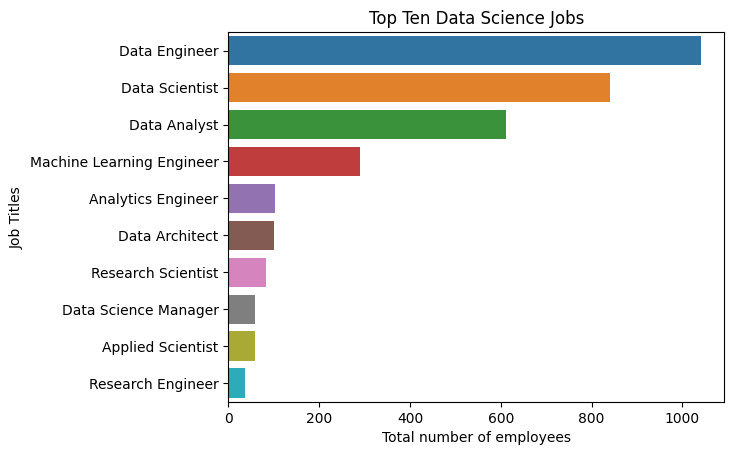

In [92]:
sns.barplot(x=top_ten['values'], y= top_ten.jobs, orient='h', width=0.8)
plt.title('Top Ten Data Science Jobs')
plt.xlabel('Total number of employees')
plt.ylabel('Job Titles')